In [6]:
from plotnine import ggplot, aes, geom_bar, labs, theme, facet_grid
import pandas as pd

url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-03-21/languages.csv"
language_by_user_df = pd.read_csv(url)

# Filter out rows with NaN values in 'number_of_users' and 'number_of_jobs' columns
language_by_user_df = language_by_user_df.dropna(subset=['number_of_users', 'number_of_jobs'])

# Sort the DataFrame by 'number_of_users' and 'number_of_jobs' in descending order
language_by_user_df = language_by_user_df.sort_values(by=['number_of_users', 'number_of_jobs'], ascending=False)

# Keep the top 10 programming languages
top_languages_users = language_by_user_df.head(10).copy()
top_languages_jobs = language_by_user_df.head(10).copy()

# Create a bar plot for number of users
plot_users = (
    ggplot(top_languages_users, aes(x='reorder(title,-number_of_users)', y='number_of_users', fill='title')) +
    geom_bar(stat='identity') +
    labs(title='Top 10 Programming Languages by User Base', x='Programming Language', y='Number of Users') +
    theme(figure_size=(15, 7))
)

# Create a bar plot for number of jobs
plot_jobs = (
    ggplot(top_languages_jobs, aes(x='reorder(title,-number_of_jobs)', y='number_of_jobs', fill='title')) +
    geom_bar(stat='identity') +
    labs(title='Top 10 Programming Languages by Jobs', x='Programming Language', y='Number of Jobs') +
    theme(figure_size=(15, 7))
)

# Combine the two plots using facet_grid
combined_plot = (
    ggplot() +
    facet_grid(None, scales='free_y') +
    plot_users +
    plot_jobs
)

# Show the combined plot
print(combined_plot)


TypeError: object of type 'NoneType' has no len()

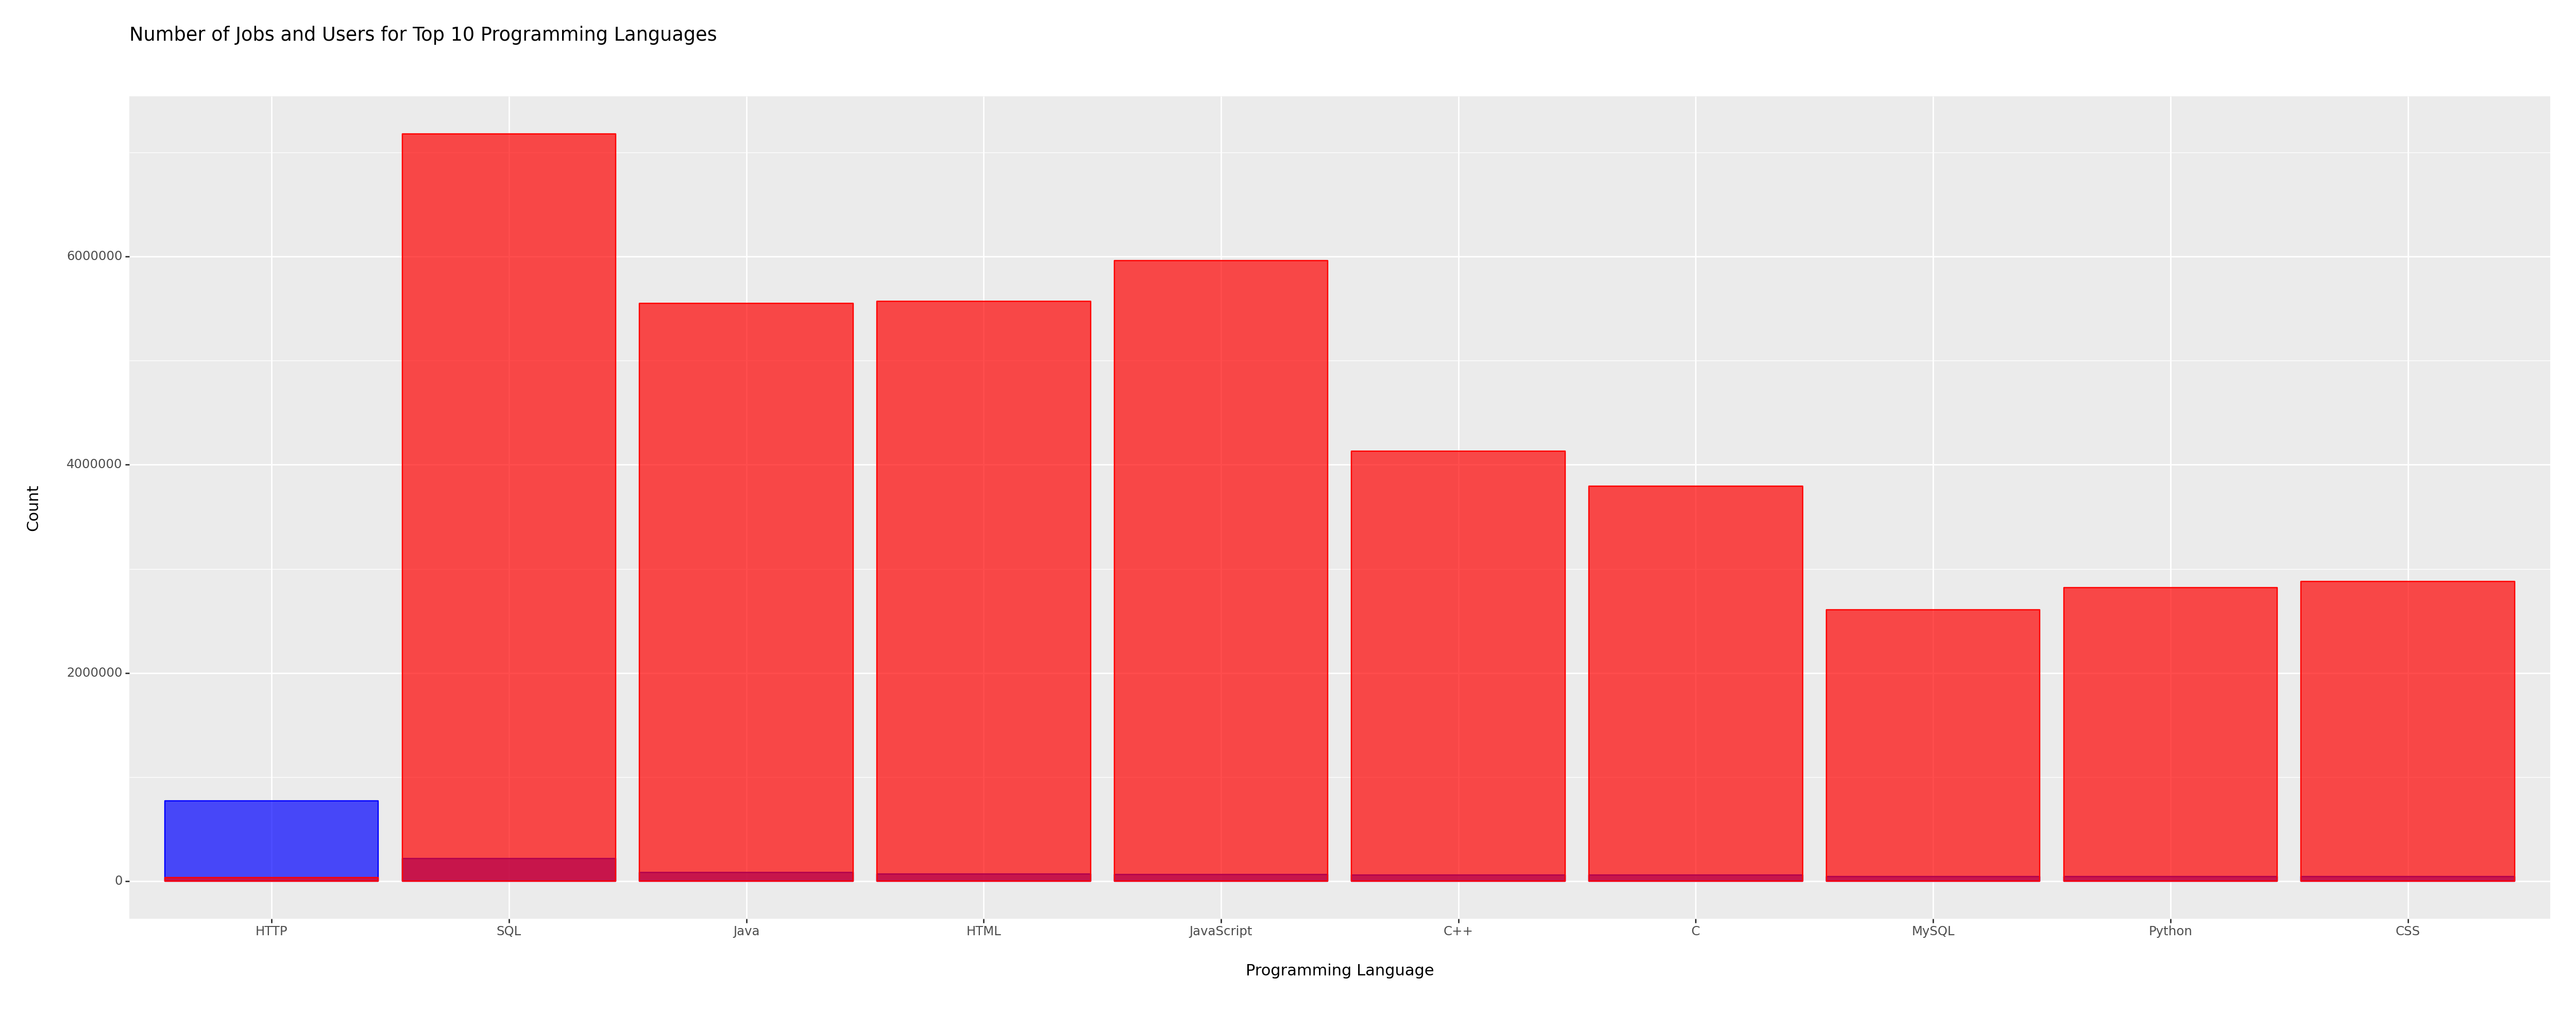

In [35]:
from plotnine import ggplot, aes, geom_bar, labs, theme
import pandas as pd

url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-03-21/languages.csv"
language_by_user_df = pd.read_csv(url)

# Filter out rows with NaN values in 'number_of_jobs' and 'number_of_users' columns
language_by_user_df = language_by_user_df.dropna(subset=['number_of_jobs', 'number_of_users'])

# Sort the DataFrame by 'number_of_jobs' and 'number_of_users' in descending order
language_by_user_df = language_by_user_df.sort_values(by=['number_of_jobs', 'number_of_users'], ascending=False)

# Keep the top 10 programming languages
top_languages = language_by_user_df.head(10).copy()

# Create a bar plot for the number of jobs and number of users side by side
combined_plot = (
    ggplot(top_languages, aes(x='reorder(title, -number_of_jobs)', fill='variable')) +
    geom_bar(aes(y='number_of_jobs'), stat='identity', position='dodge', color='blue', fill='blue', alpha=0.7) +
    geom_bar(aes(y='number_of_users'), stat='identity', position='dodge', color='red', fill='red', alpha=0.7) +
    labs(title='Number of Jobs and Users for Top 10 Programming Languages', x='Programming Language', y='Count') +
    labs(fill='Legend Title') +  # Add this line for the legend
    theme(figure_size=(15, 10))
)

# Show the combined plot
print(combined_plot)
